<a href="https://colab.research.google.com/github/CharlemagneBrain/ECG_Image_Preprocessing/blob/main/Pr%C3%A9traitement_Images_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CHARLES ABDOULAYE NGOM

# Pré-traitement des données provenant des ECG




In [ ]:
!ls "/content/drive/MyDrive/"

'Colab Notebooks'   dantec.jpg	 dantec.pdf   ecg_tracings.hdf5


In [ ]:
!pip install pdf2image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install neurokit2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 7.1 MB/s 


In [ ]:
# On convertit tout d'abord notre fichier pdf en image afin 
#d'appliquer le processus mis au dessus 
from pdf2image import convert_from_path
pages = convert_from_path('/content/drive/MyDrive/dantec.pdf', 500)

for page in pages:
    page.save('dantec.jpg', 'JPEG')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Nous importons nos différentes bibliothéques

import matplotlib.pyplot as plt
import cv2
import numpy as np
import heartpy as hp
import pandas as pd
import matplotlib.image as mpimg
import neurokit2 as nk


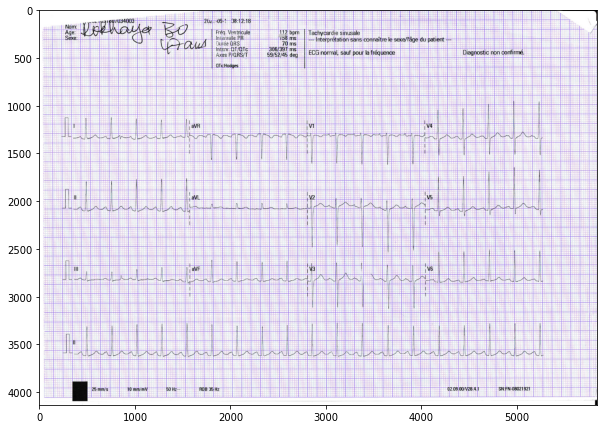

In [ ]:
# On charge l'image initiale sous format RGB
plt.figure(figsize=(10, 8))
ecg = cv2.imread('dantec.jpg')
ecg_norm = cv2.rotate(ecg, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(ecg_norm);

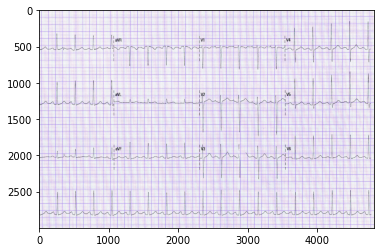

In [ ]:
# On rogne l'image afin de ne garder que les éléments dont nous avons besoin pour le prétraitement
crop_ecg_img = ecg_norm[800:3800, 500:5325]
plt.imshow(crop_ecg_img,cmap="gray", aspect="auto");

**Mise en Noir et Blanc** : l'image en couleur au format RGB est une superposition de 3 matrices (Rouge Vert Bleu). Ce que nous faisons ici c'est tranformer cette matrice à 3 dimensions en deux dimension en la passant au noir et blanc. Ce qui rendra notre image plus facile à traiter.
</br>

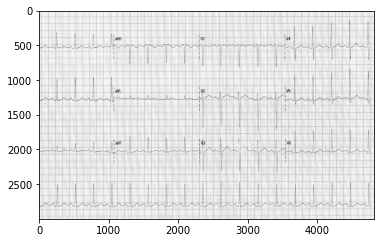

In [ ]:
#Nous pouvons également convertir 
#une image en niveaux de gris en utilisant la formule de conversion standard RGB
#en niveaux de gris qui est imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B.

mat_read = mpimg.imread('dantec.jpg')
mat_norm = cv2.rotate(mat_read, cv2.ROTATE_90_CLOCKWISE) 
mat_crop = mat_norm[800:3800, 500:5325]

R, G, B = mat_crop[:,:,0], mat_crop[:,:,1], mat_crop[:,:,2]

mat_gray = 0.2989 * R + 0.5870 * G + 0.1140 * B
mat_gray = mat_gray.astype("uint8")
(thresh, im_bw) = cv2.threshold(mat_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(mat_gray, cmap='gray')
plt.show()


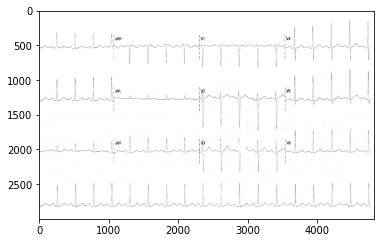

In [ ]:
mat_gray =mat_gray.astype("uint8")
(thresh, im_bw) = cv2.threshold(mat_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh
thresh = 110
im_bw = cv2.threshold(mat_gray, thresh, 255, cv2.THRESH_BINARY)[1]

plt.imshow(im_bw, cmap='gray');

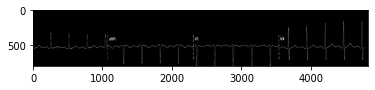

In [ ]:
cr_im_bw = im_bw[0:800, 0:5350]
neg = 255 - cr_im_bw
plt.imshow(neg, cmap="gray")

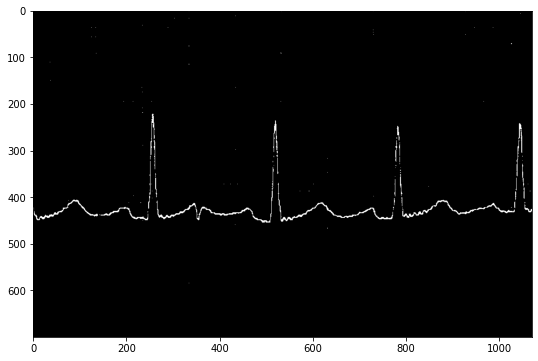

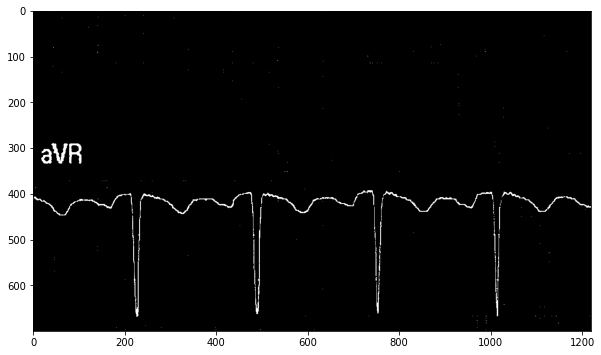

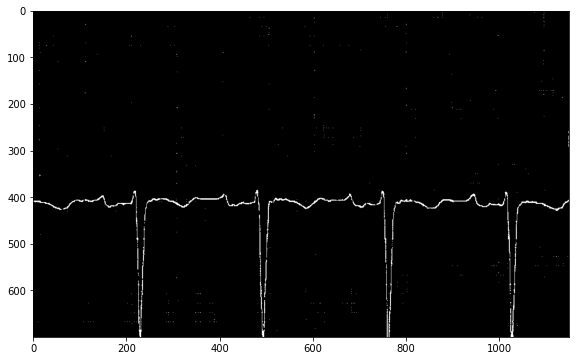

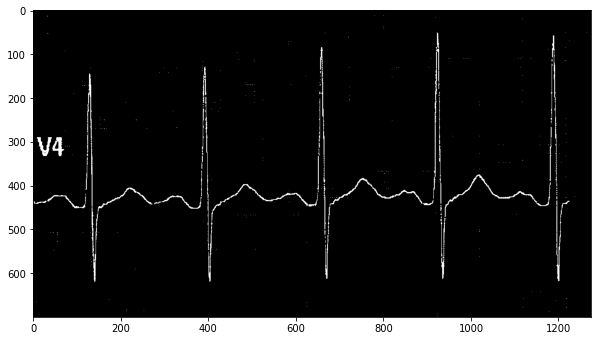

In [ ]:
a1 = neg[100:800,0:1070]
a2 = neg[100:800,1080:2300]
a3 = neg[100:800,2390:3540]
a4 = neg[100:800,3550:5000]

plt.figure(figsize=(10,6))
plt.imshow(a1, cmap='gray');
plt.figure(figsize=(10,6))
plt.imshow(a2, cmap='gray');
plt.figure(figsize=(10,6))
plt.imshow(a3, cmap='gray');
plt.figure(figsize=(10,6))
plt.imshow(a4, cmap='gray');

In [ ]:
a3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

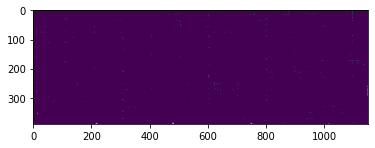

In [ ]:
a3_sup = a3[0:390, :]
plt.imshow(a3_sup);

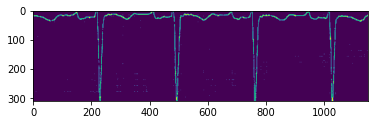

In [ ]:
a3_inf = a3[390:700, :]
plt.imshow(a3_inf);

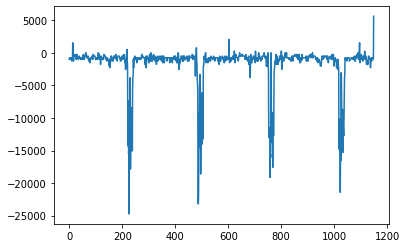

In [ ]:
inf3_sum_col = [ sum(x) for x in zip(*a3_inf) ]
sup3_sum_col = [ sum(x) for x in zip(*a3_sup) ]

negative_inf3 = [element * -1 for element in inf3_sum_col]
re_array_3 = np.vstack((sup3_sum_col, negative_inf3))

final_result3 = [ sum(x) for x in zip(*re_array_3) ]
#plt.figure(figsize=(70,6))
plt.plot(final_result3);

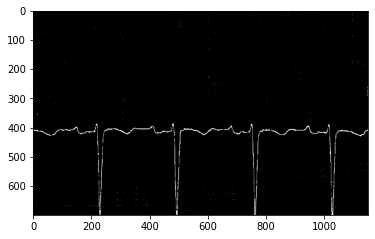

In [ ]:
plt.imshow(a3, cmap='gray');

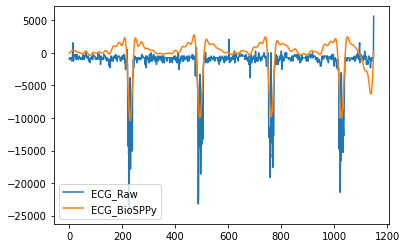

In [ ]:
signals = pd.DataFrame({"ECG_Raw" : final_result3,
                        #"ECG_NeuroKit" : nk.ecg_clean(final_result3, sampling_rate=1000, method="neurokit")
                        "ECG_BioSPPy" : nk.ecg_clean(final_result3, sampling_rate=1000, method="biosppy")
                        #"ECG_PanTompkins" : nk.ecg_clean(final_result3, sampling_rate=1000, method="pantompkins1985")
                        #"ECG_Hamilton" : nk.ecg_clean(final_result3, sampling_rate=1000, method="hamilton2002")
                        #"ECG_Elgendi" : nk.ecg_clean(final_result3, sampling_rate=1000, method="elgendi2010")
                        #"ECG_EngZeeMod" : nk.ecg_clean(final_result3, sampling_rate=1000, method="engzeemod2012")
                        })

signals.plot();

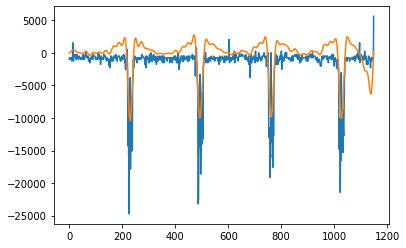

In [ ]:
plt.plot(signals);

In [ ]:
signals

,ECG_Raw,ECG_BioSPPy
0,-1020,-43.213430
1,-765,-10.605684
2,-765,22.439802
3,-765,56.294099
4,-765,91.200586
...,...,...
1145,-1020,-3578.178939
1146,-1020,-2715.556626
1147,-1020,-1775.826069
1148,-765,-782.721516


In [ ]:
nulll = signals.ECG_BioSPPy.astype(int)
nulll

0        -43
1        -10
2         22
3         56
4         91
        ... 
1145   -3578
1146   -2715
1147   -1775
1148    -782
1149     237
Name: ECG_BioSPPy, Length: 1150, dtype: int64

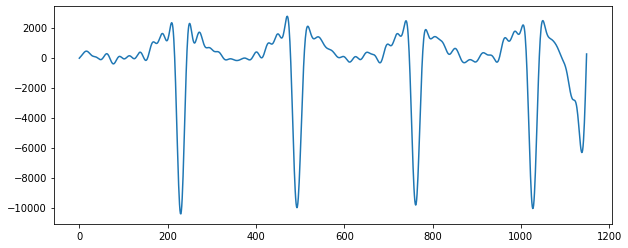

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(signals.ECG_BioSPPy);

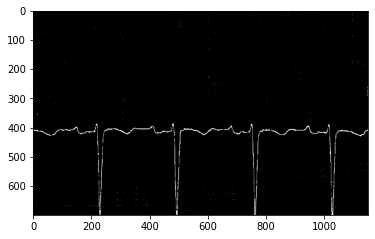

In [ ]:
plt.imshow(a3, cmap='gray');